In [1]:
import pandas as pd
import numpy as np

In [9]:
retail_df = pd.read_excel('data/Online Retail.xlsx')
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [3]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [13]:
print((retail_df['Quantity'] <= 0).sum())
print((retail_df['UnitPrice'] < 0).sum())

10624
2


In [14]:
retail_df = retail_df[retail_df['Quantity']>0]
retail_df = retail_df[retail_df['UnitPrice']>0]
retail_df = retail_df[retail_df['CustomerID'].notnull()]

In [15]:
print((retail_df['Quantity'] <= 0).sum())
print((retail_df['UnitPrice'] < 0).sum())
print(retail_df.isnull().sum())

0
0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [17]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


In [18]:
retail_df.drop_duplicates(inplace=True)

In [19]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [22]:
retail_df.StockCode.value_counts().head(20)

StockCode
85123A    2023
22423     1713
85099B    1615
84879     1395
47566     1389
20725     1304
22720     1152
POST      1099
23203     1091
20727     1078
22383     1063
22197     1060
21212     1050
23298     1021
23209     1020
22086     1003
22382      993
22469      979
20728      977
22457      972
Name: count, dtype: int64

In [23]:
retail_df.CustomerID.value_counts()

CustomerID
17841.0    7676
14911.0    5670
14096.0    5111
12748.0    4412
14606.0    2677
           ... 
16765.0       1
13302.0       1
13270.0       1
16148.0       1
17846.0       1
Name: count, Length: 4338, dtype: int64

In [24]:
retail_df.Country.value_counts()

Country
United Kingdom          349203
Germany                   9025
France                    8326
EIRE                      7226
Spain                     2479
Netherlands               2359
Belgium                   2031
Switzerland               1841
Portugal                  1453
Australia                 1181
Norway                    1071
Italy                      758
Channel Islands            747
Finland                    685
Cyprus                     603
Sweden                     450
Austria                    398
Denmark                    380
Poland                     330
Japan                      321
Israel                     245
Unspecified                241
Singapore                  222
Iceland                    182
USA                        179
Canada                     151
Greece                     145
Malta                      112
United Arab Emirates        68
European Community          60
RSA                         57
Lebanon                     45


In [25]:
retail_df['SaleAmount'] = retail_df['Quantity'] * retail_df['UnitPrice']
retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,SaleAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [26]:
retail_df['CustomerID'] = retail_df['CustomerID'].astype('int')
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int32         
 7   Country      392692 non-null  object        
 8   SaleAmount   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 28.5+ MB


In [27]:
# 마케팅에 이용하기 위한 고객 주문횟수, 총 구매액, 마지막 주문 후 경과일
aggregation = {
    'InvoiceNo' : 'count',
    'SaleAmount' : 'sum',
    'InvoiceDate' : 'max'
} # GroupBy에 사용할 집계함수 정의
customer_df = retail_df.groupby('CustomerID').agg(aggregation)
customer_df

,InvoiceNo,SaleAmount,InvoiceDate
CustomerID,,,
12346,1,77183.60,2011-01-18 10:01:00
12347,182,4310.00,2011-12-07 15:52:00
12348,31,1797.24,2011-09-25 13:13:00
12349,73,1757.55,2011-11-21 09:51:00
12350,17,334.40,2011-02-02 16:01:00
...,...,...,...
18280,10,180.60,2011-03-07 09:52:00
18281,7,80.82,2011-06-12 10:53:00
18282,12,178.05,2011-12-02 11:43:00


In [29]:
customer_df = customer_df.rename(columns={
    'InvoiceNo' : 'Frequency',
    'InvoiceDate' : "ElapsedDays"
})

In [30]:
import datetime
customer_df['ElapsedDays'] = (datetime.datetime(2011,12,31) - customer_df['ElapsedDays'])

In [31]:
customer_df['ElapsedDays'] = customer_df['ElapsedDays'].apply(lambda x : x.days+1)
customer_df.head()

,Frequency,SaleAmount,ElapsedDays
CustomerID,,,
12346,1,77183.60,347
12347,182,4310.00,24
12348,31,1797.24,97
12349,73,1757.55,40
12350,17,334.40,332


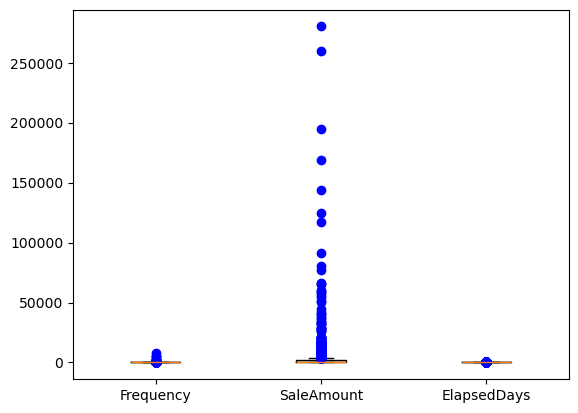

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
ax.boxplot([customer_df['Frequency'], customer_df['SaleAmount'],
            customer_df['ElapsedDays']], sym='bo')
plt.xticks([1,2,3], ['Frequency', 'SaleAmount', 'ElapsedDays'])
plt.show()

In [33]:
import numpy as np
# 로그 변환을 통해 분포를 정규화(log1p = log(1+x) 0일때 무한대값을 가지는 것을 방지함.)
customer_df['Frequency_log'] = np.log1p(customer_df['Frequency'])
customer_df['SaleAmount_log'] = np.log1p(customer_df['SaleAmount'])
customer_df['ElapsedDays_log'] = np.log1p(customer_df['ElapsedDays'])
customer_df.head()

,Frequency,SaleAmount,ElapsedDays,Frequency_log,SaleAmount_log,ElapsedDays_log
CustomerID,,,,,,
12346,1,77183.60,347,0.693147,11.253955,5.852202
12347,182,4310.00,24,5.209486,8.368925,3.218876
12348,31,1797.24,97,3.465736,7.494564,4.584967
12349,73,1757.55,40,4.304065,7.472245,3.713572
12350,17,334.40,332,2.890372,5.815324,5.808142


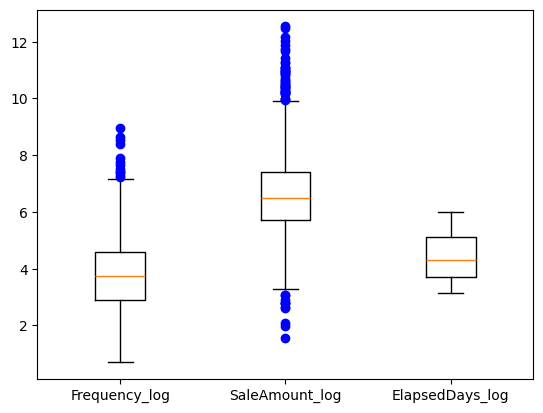

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
ax.boxplot([customer_df['Frequency_log'], customer_df['SaleAmount_log'],
            customer_df['ElapsedDays_log']], sym='bo')
plt.xticks([1,2,3], ['Frequency_log', 'SaleAmount_log', 'ElapsedDays_log'])
plt.show()

In [35]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

In [36]:
x_features = customer_df[['Frequency_log', 'SaleAmount_log', 'ElapsedDays_log']].values
x_features

array([[ 0.69314718, 11.25395523,  5.85220248],
       [ 5.20948615,  8.36892517,  3.21887582],
       [ 3.4657359 ,  7.49456369,  4.58496748],
       ...,
       [ 2.56494936,  5.1876651 ,  3.40119738],
       [ 6.58202514,  7.62390095,  3.25809654],
       [ 4.26267988,  7.51658563,  4.17438727]])

In [37]:
from sklearn.preprocessing import StandardScaler
x_features_scaled = StandardScaler().fit_transform(x_features)

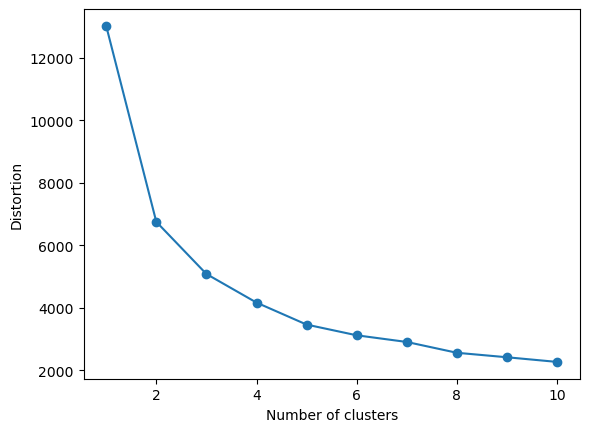

In [39]:
distortions = []
for i in range(1, 11):
    kmeans_i = KMeans(n_clusters=i, random_state=0)
    kmeans_i.fit(x_features_scaled) 
    distortions.append(kmeans_i.inertia_) # inertia_ : 클러스터 중심과 각 데이터 포인트 사이의 거리 제곱합

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [50]:
kmeans = KMeans(n_clusters=4, random_state=0)
y_label = kmeans.fit_predict(x_features_scaled)
customer_df['Cluster'] = y_label
customer_df


,Frequency,SaleAmount,ElapsedDays,Frequency_log,SaleAmount_log,ElapsedDays_log,Cluster
CustomerID,,,,,,,
12346,1,77183.60,347,0.693147,11.253955,5.852202,0
12347,182,4310.00,24,5.209486,8.368925,3.218876,1
12348,31,1797.24,97,3.465736,7.494564,4.584967,3
12349,73,1757.55,40,4.304065,7.472245,3.713572,3
12350,17,334.40,332,2.890372,5.815324,5.808142,0
...,...,...,...,...,...,...,...
18280,10,180.60,299,2.397895,5.201806,5.703782,0
18281,7,80.82,202,2.079442,4.404522,5.313206,0
18282,12,178.05,29,2.564949,5.187665,3.401197,2


In [51]:
group_customer = customer_df.groupby('Cluster').agg({
    'Frequency' : 'mean',
    'SaleAmount' : 'mean',
    'ElapsedDays' : 'mean',})
group_customer

,Frequency,SaleAmount,ElapsedDays
Cluster,,,
0,19.706406,427.804546,256.313167
1,285.526807,7217.539161,37.179487
2,19.106145,349.973543,61.070391
3,74.236824,1300.808804,82.228611


In [61]:
from matplotlib import pyplot as plt
import seaborn as sns

def silhouetteViz(n_clusters, x_features):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    y_label = kmeans.fit_predict(x_features)

    silhouette_values = silhouette_samples(x_features, y_label, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for i in range(n_clusters):
        cluster_silhouettes = silhouette_values[y_label == i] #y_label이 i 인 데이터의 실루엣 값만 가져옴
        cluster_silhouettes.sort() # 실루엣 값 정렬

        y_ax_upper += len(cluster_silhouettes)
        color = plt.cm.jet(float(i)/ n_clusters) # 색상 설정(0~1 사이의 값으로 색상 맵에서 색상을 가져옴)

        plt.barh(range(y_ax_lower, y_ax_upper), cluster_silhouettes, height=1.0, edgecolor='none', color=color)
        
        y_ticks.append((y_ax_lower + y_ax_upper) / 2)

        y_ax_lower += len(cluster_silhouettes)

    silhouette_avg = np.mean(silhouette_values) #전체 실루엣 값의 평균
    plt.axvline(silhouette_avg, color='red', linestyle='--') # 평균 실루엣 값 선으로 표시

    plt.title('Silhouette Plot for n_Clusters = {}\n silhouette score: {} '.format(n_clusters, silhouette_avg))
    plt.xlabel('Silhouette Coefficient Values')
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.yticks(y_ticks, range(n_clusters))
    plt.ylabel('Cluster Label')
    plt.show()

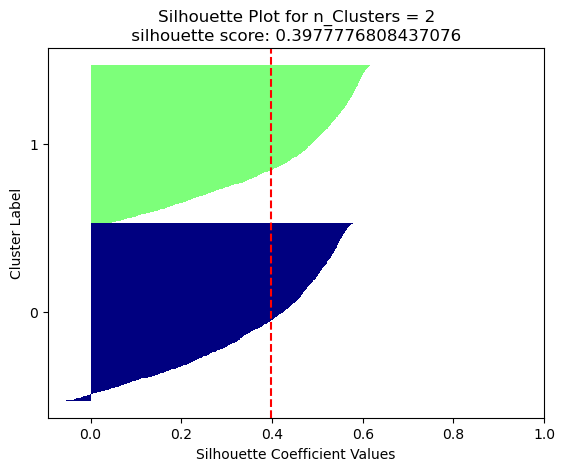

In [62]:
silhouetteViz(2, x_features_scaled)

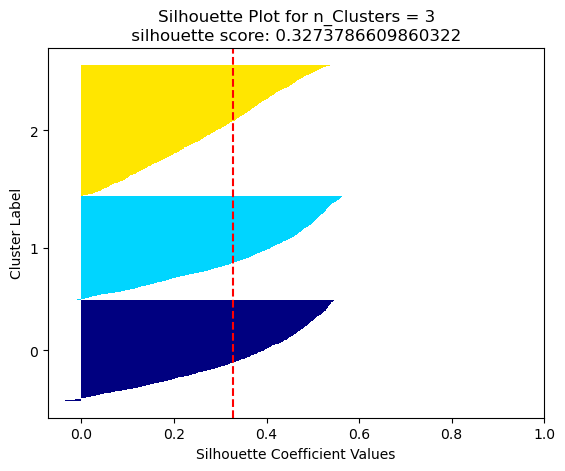

In [66]:
silhouetteViz(3, x_features_scaled)

In [71]:
def clusterScatter(n_clusters, x_features):
    c_color=[]
    kmeans = KMeans(n_clusters=n_clusters, random_state=0) # KMeans 객체 생성
    y_label = kmeans.fit_predict(x_features)

    for i in range(n_clusters):
        c_color.append(plt.cm.jet(float(i)/ n_clusters)) 
        plt.scatter(x_features[y_label == i, 0],
                    x_features[y_label == i, 1],
                    c=c_color[i], edgecolors='black', label='Cluster {}'.format(i), s=50)
    for i in range(n_clusters):
        plt.scatter(kmeans.cluster_centers_[i, 0],
                    kmeans.cluster_centers_[i, 1],
                    marker='^', color=c_color[i], s=200, edgecolors='w')
    
    plt.legend()
    plt.title('KMeans Clustering with n_Clusters = {}'.format(n_clusters))  
    plt.show()  

C:\Users\admin\AppData\Local\Temp\ipykernel_13468\2618716800.py:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_features[y_label == i, 0],


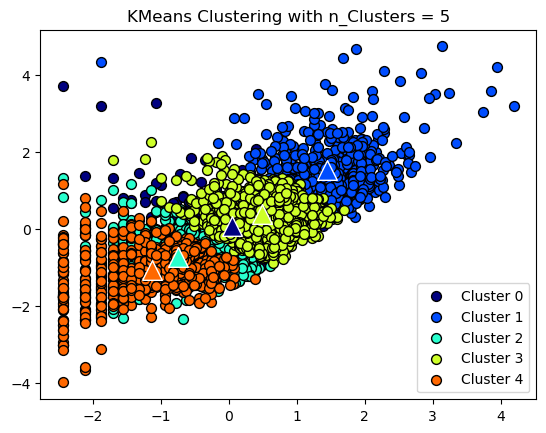

In [88]:
clusterScatter(5, x_features_scaled)